# Red Wine Quality Project
***
***

# Goal
***
- Predict the quality of red wines based on some of their various physiochemical attributes

# Setup
***

In [1]:
# establishing environment
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

# Acquire
Acquiring the data for this project
***

In [2]:
# acquiring data from local csv
wines = pd.read_csv('winequality-red.csv')

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Prepare
Preparing the data for this project

## Changing spaces in column names to '_'

In [3]:
# replacing spaces with underscores in column names
wines.columns = wines.columns.str.replace(' ', '_')

## Changing all column names to be completed lowercase

In [4]:
# lowercasing all column names
wines.columns = wines.columns.str.lower()

## Outliers
After reviewing the data in-depth for outliers, I believe that the outliers are legitimate values. I don't want to remove non-erroneous data so I'm leaving the outliers in, with their original values.

## Splitting data

In [5]:
# splitting data
train_validate, test = train_test_split(wines, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

## Scaling data

In [6]:
# creating list of DFs
df_list = [train, validate, test]
# creating empty list to hold names of columns to scale
cols_to_scale_l = []
# creating empty list to hold names of scaled columns
scaled_cols_l = []

# iterating through each column to be scaled of each df
for df in df_list:
    for col in df:
        if col != 'quality':
            # making temporary variable that holds current column name concatenated with '_s' at the end
            scaled_col_name = col + '_s'
            # appending col name to list
            cols_to_scale_l.append(col)
            # appending concatenated col name to list
            scaled_cols_l.append(scaled_col_name)
            # adding column with concatenated col name to current df
            df[scaled_col_name] = 0

# moving 'quality' column to end of each df
for df in df_list:
    quality_col = df.pop('quality')
    df['quality'] = quality_col

In [7]:
# creating scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

# fitting scaler to train column and scaling after
train[scaled_cols_l] = scaler.fit_transform(train[cols_to_scale_l])

# scaling data in validate and test dataframes
validate[scaled_cols_l] = scaler.transform(validate[cols_to_scale_l])
test[scaled_cols_l] = scaler.transform(test[cols_to_scale_l])

# Explore
Exploring the data to find insights about what drives wine quality
***

## General Exploration: Creating heatmap of all scaled variables and quality

In [17]:
# creating empty list
heatmap_cols = []

# creating list of scaled variables and target variable
for col in train:
    if col[-2:] == '_s' or col == 'quality':
        heatmap_cols.append(col)

# creating df from list of columns
heatmap_df = train[heatmap_cols]

<AxesSubplot:>

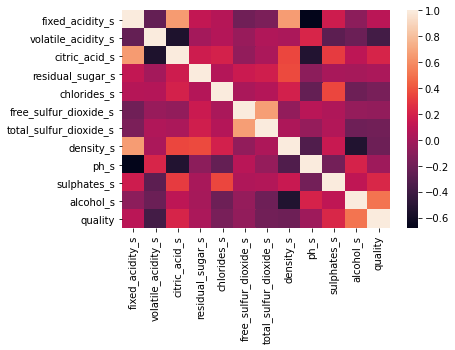

In [21]:
# calculating correlation values between variables
corr_matrix = heatmap_df.corr()
 
# plotting heatmap
sns.heatmap(corr_matrix)